✍ В этом юните вы углубите свои знания ансамблей алгоритмов. Вы познакомитесь с тем, как формируются бутстреп-выборки, а также досконально изучите принцип **бэггинга** — самого простого варианта ансамблей.

В основе бэггинга лежит статистический метод, который называется **бутстрепом (bootstrap)**. Идея бутстрепа заключается в генерации *выборок размера n* из исходного датасета размера *N* путём случайного выбора элементов с повторениями в каждом из наблюдений.

**Рассмотрим идею бутстрепа на элементарном примере.**

Пусть у нас есть выборка из 12 клиентов компании: у каждого из них есть свой ID (от 1 до 12) и какие-то характеристики. Мы можем создавать из данной выборки множество различных новых выборок клиентов с новым количеством человек (в данном случае представлены выборки из пяти человек). При этом информацию про одного и того же клиента можно использовать повторно.

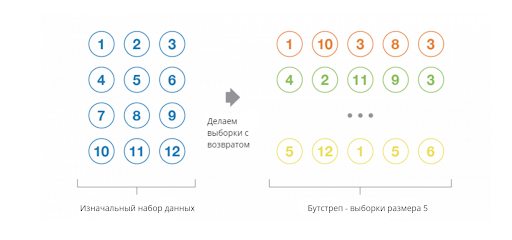

Это намного проще, чем находить новые выборки. По сути, мы собираем данные лишь единожды, а затем на их основе генерируем много выборок для обучения моделей. Это экономит огромные объёмы ресурсов и времени.

### При некотором приближении можно считать, что получающиеся выборки являются независимыми и репрезентативными — **это важное допущение**.

## Выборки можно назвать **независимыми**, если результаты испытаний и измерения, осуществляемые для одной выборки, никак не влияют на результаты, получаемые на другой выборке.

---

## **Репрезентативность** заключается в соответствии характеристик выборки всей генеральной совокупности.

К примеру, если мы хотим исследовать мнение всех женщин России по какому-то вопросу, то все женщины России — это **генеральная совокупность**.

**Репрезентативная выборка** — это такая группа женщин, для которой основные характеристики соответствуют характеристикам для генеральной совокупности. Допустим, если среди всех российских женщин 60 % имеют детей, а 40 % — не имеют, то соотношение в выборке должно быть таким же.

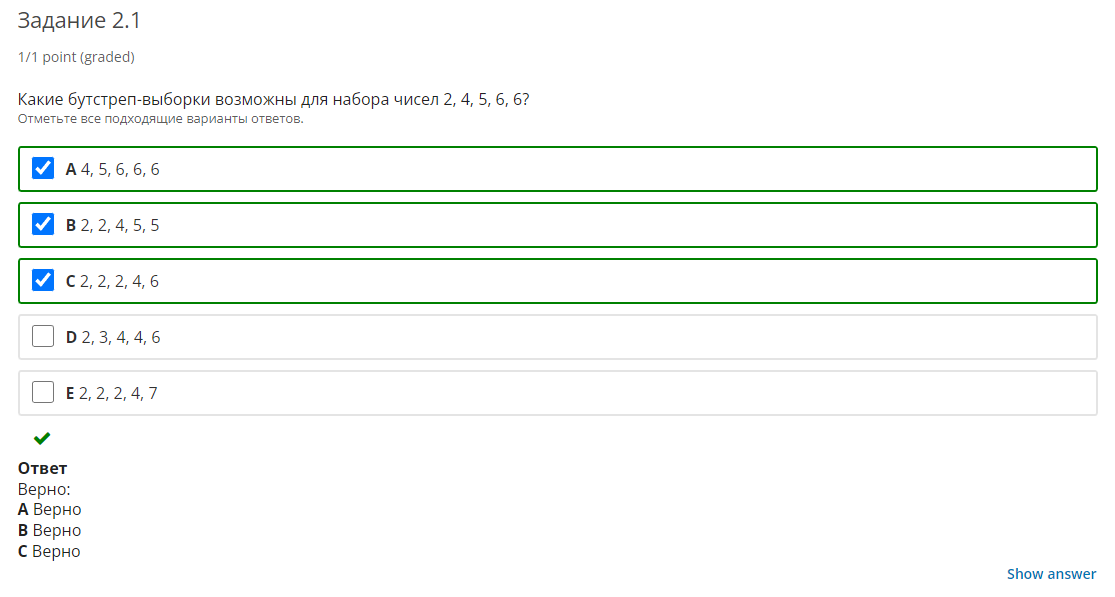

Бутстреп-выборки часто используются для оценки различных статистических показателей, например разброса или доверительного интервала.

Если вычислять статистические оценки на нескольких независимых выборках, то мы можем, например, оценить их математическое ожидание или разброс. Приведём пример того, как это происходит с точки зрения математики.

*Допустим, у нас есть некоторая выборка $x = (5, 1, 3, 6, 4)$, и мы хотим оценить для неё математическое ожидание. Например, это может быть выборка количества товаров, которые приобретали покупатели нашего магазина, и мы хотим найти ожидаемое количество товаров, которое купит случайный клиент.*

Конечно, мы без проблем можем его вычислить:

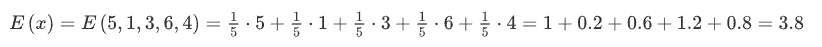

Однако это значение лишь на одной выборке, а мы хотели бы вычислить эту статистическую оценку на нескольких выборках и затем проанализировать разброс оценок.

Создаём несколько выборок с помощью бутстрепа и на каждой оцениваем математическое ожидание:

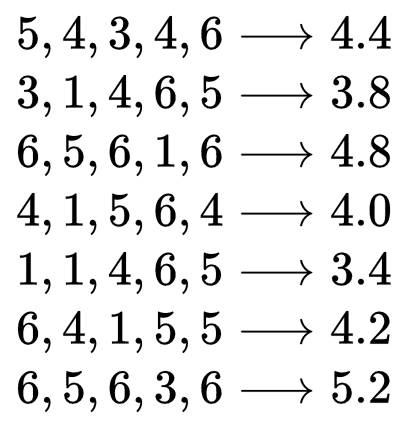

Получили ряд значений:

$$4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2$$

Теперь давайте найдём дисперсию для этого ряда. Мы с вами делали это в модуле по теории вероятностей — самое время вспомнить!

## Задание 2.2

Вычислите дисперсию для этого ряда. Результат округлите до трёх знаков после точки-разделителя.

In [ ]:
import numpy as np

In [ ]:
a = np.array([4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2])
b = a.mean()
np.sum((a - b)**2)/7

0.31673469387755115

Таким образом, мы понимаем, что если мы будем создавать различные новые выборки и вычислять для них средние значения, то для полученных значений дисперсия будет равна найденному вами выше значению. **Заметьте: мы узнали это, не собирая никаких новых данных.**

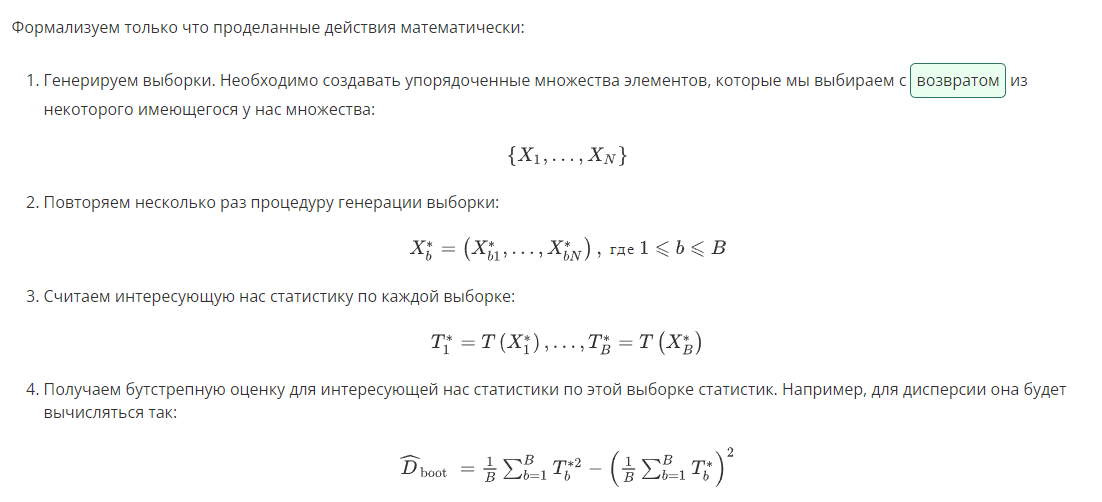

### Отлично, мы разобрались с тем, что такое метод бутстрепа. Запомните его идею — совсем скоро она пригодится вам для понимания алгоритма бэггинга.

# **BIAS И VARIANCE**

Прежде чем перейти непосредственно к ансамблям моделей, нам необходимо повторить bias-variance decomposition, или, как его называют по-русски, «разложение ошибки на смещение и разброс». Оно очень полезно для анализа ансамблей моделей.

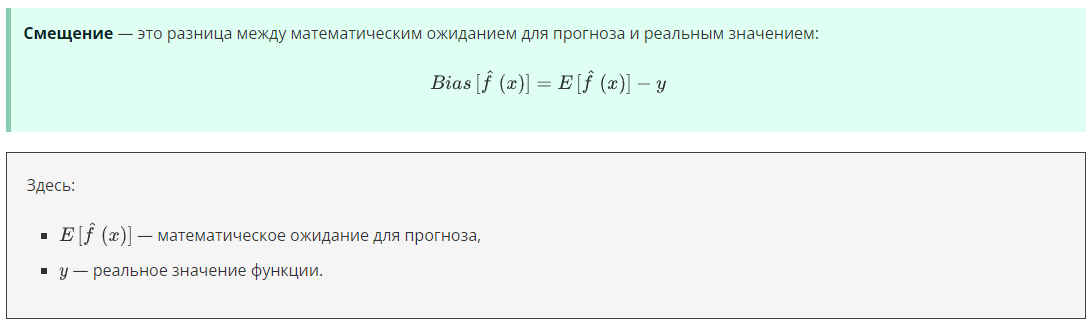

## **Смысл смещения** — способность получить лучшую среди всех возможных моделей, то есть максимально точные прогнозы.

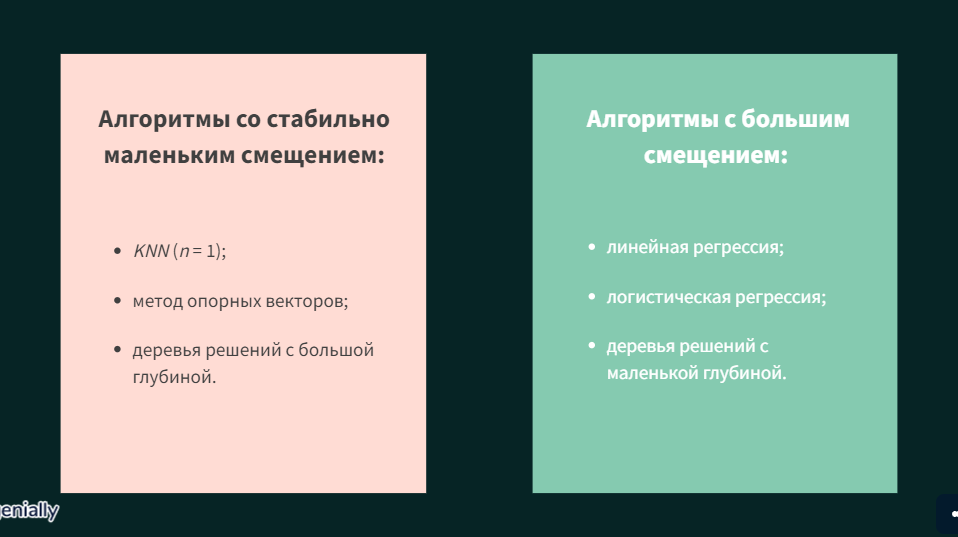

### Также значение смещения часто называют **ошибкой смещения** или **ошибкой из-за смещения.**

### Если у модели большое смещение, это значит, что ошибка будет достаточно велика из-за слишком сильного упрощения модели.

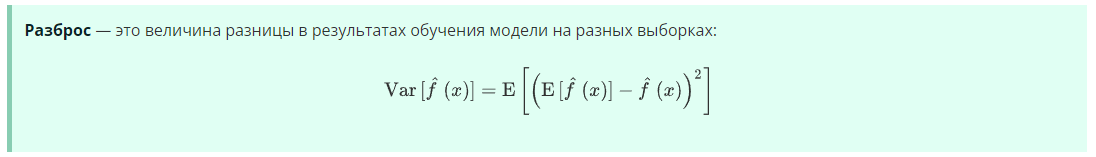

### **Примечание.** С математической точки зрения разброс модели определяется как математическое ожидание квадрата разницы ожидаемого прогноза и реализованного прогноза модели.

Разброс характеризует устойчивость модели к изменениям в обучающей выборке:

+ Если результат сильно зависит от того, какие объекты присутствуют в выборке, разброс будет большим.
+ Если алгоритм работает стабильно вне зависимости от особенностей выборки, разброс будет маленьким.

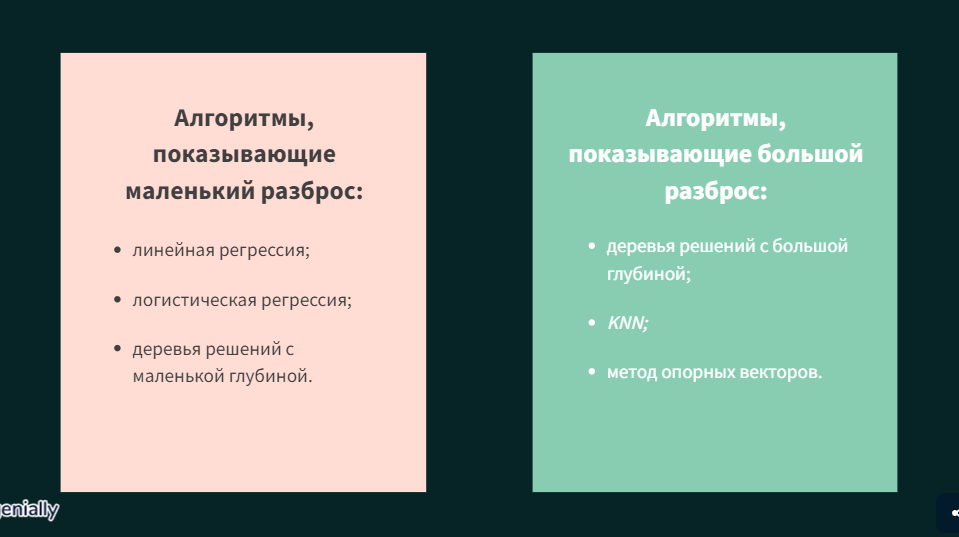

### Давайте рассмотрим разложение на смещение и разброс для линейной регрессии.

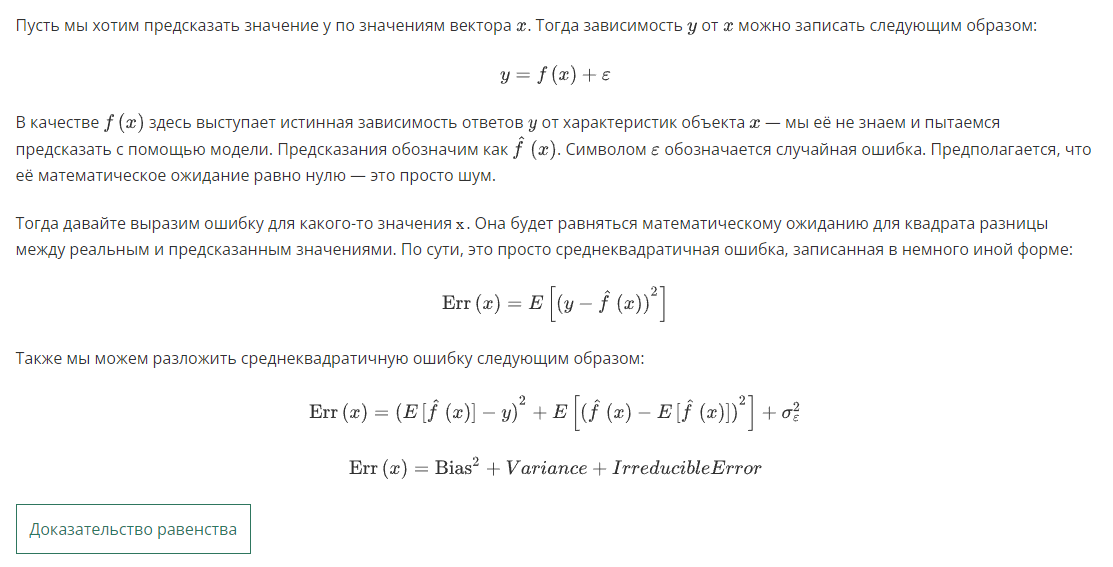
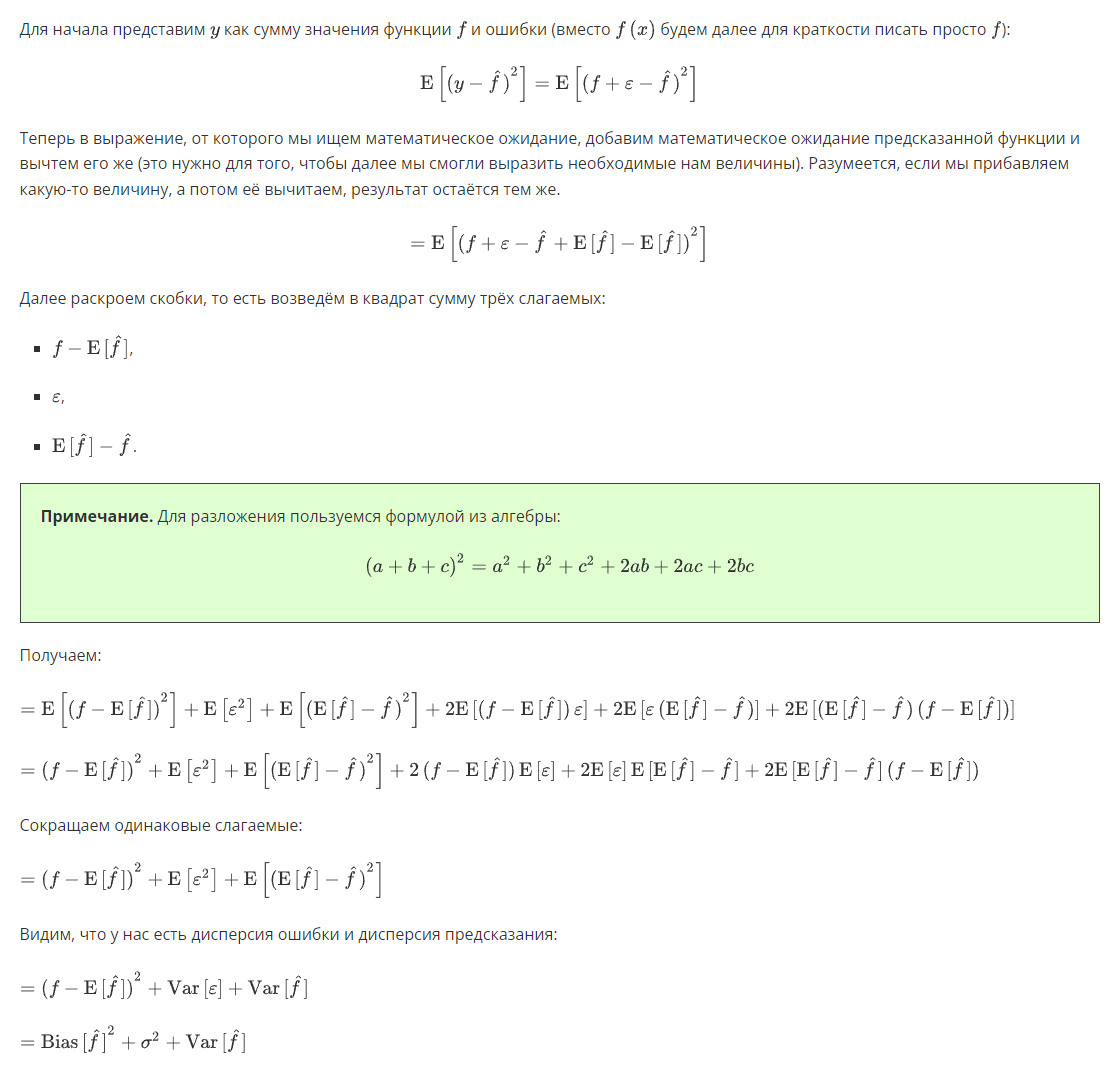

## Итак, мы получили, что наша ошибка — это сумма смещения для квадрата прогноза, разброса и неустранимой случайной ошибки. Теперь мы понимаем, из чего состоит ошибка модели. Такое представление помогает нам исследовать с теоретической точки зрения некоторые алгоритмы машинного обучения и часто используется при изучении ансамблей.

Рассмотрим иллюстрацию того, как сдвиг и разброс влияют на качество предсказания. На рисунке ниже вы видите цель (красный круг), в которую мы хотим попасть.

[Есть четыре ситуации](https://view.genial.ly/62e9887a3a28d00018850689/interactive-content-dst-30-mathandml-9unit23)

В моделях машинного обучения принцип тот же, только в качестве центра мишени выступает минимально возможная ошибка.

Когда говорят про разложение на bias и variance, то часто упоминают некую **точку баланса**:

+ Если модель очень простая, с маленьким количеством параметров, то, скорее всего, у неё будет очень большое смещение, но маленький разброс.
+ Если модель очень сложная, со множеством параметров, у неё будет большой разброс и маленькое смещение.

Схематично эти зависимости можно изобразить следующим образом (это схема не для конкретной модели, а лишь иллюстрация тенденций):

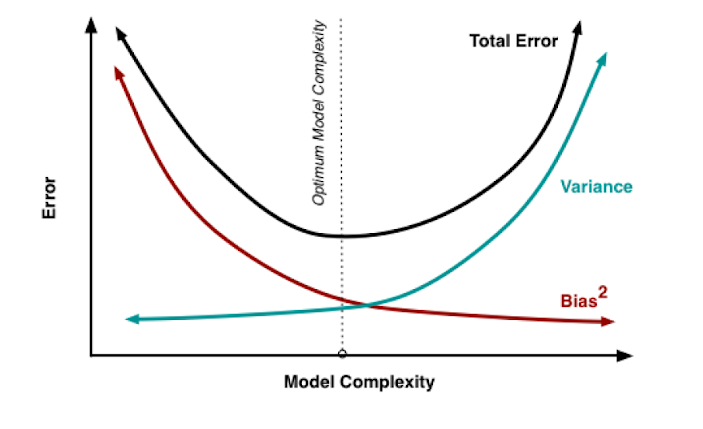

На графике выше по оси абсцисс отложена сложность модели (Model Complexity), а по оси ординат — ошибка (Error). Также изображены смещение ($Bias^2$), разброс ($Variance$) и ошибка (*Total Error* — сумма смещения и разброса).

Как вы можете видеть, есть некоторая оптимальная точка, в которой разброс и смещение небольшие, а ошибка минимальна. Именно эта точка нас и интересует.

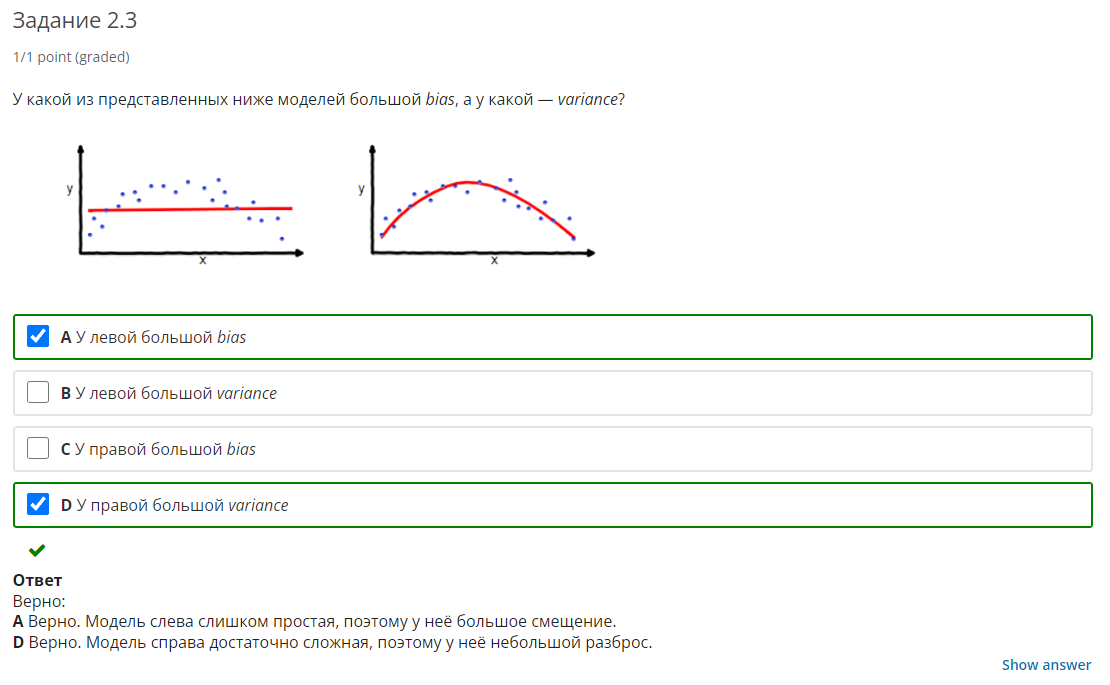

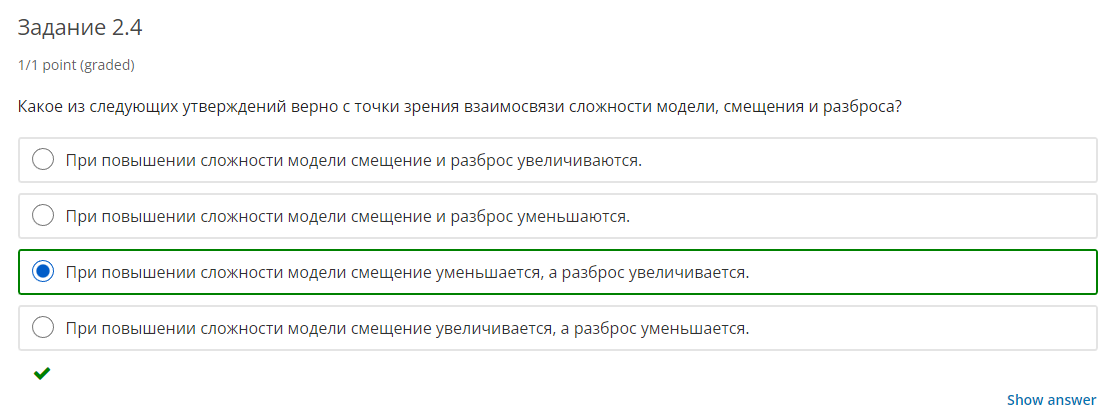

# **БЭГГИНГ**

Перейдём к понятию бэггинг.

При построении моделей всегда есть вероятность, что при обучении на других данных получились бы другие результаты. Для того чтобы нивелировать такую вероятность, можно использовать бэггинг.

Его идея состоит в том, что мы берём несколько независимых моделей и усредняем полученные по ним результаты. Таким образом мы получаем модель, имеющую меньший разброс, так как при её построении мы учли несколько моделей.

Как уже было сказано, в реальности получить много независимых выборок слишком сложно, так как найти столько данных обычно невозможно. Поэтому мы используем бутстреп-выборки, о которых говорили в начале юнита.

## Важно отметить, что при бэггинге размер каждой бутстреп-выборки должен совпадать с размером исходной выборки.

Схематично процесс бэггинга можно представить следующим образом:

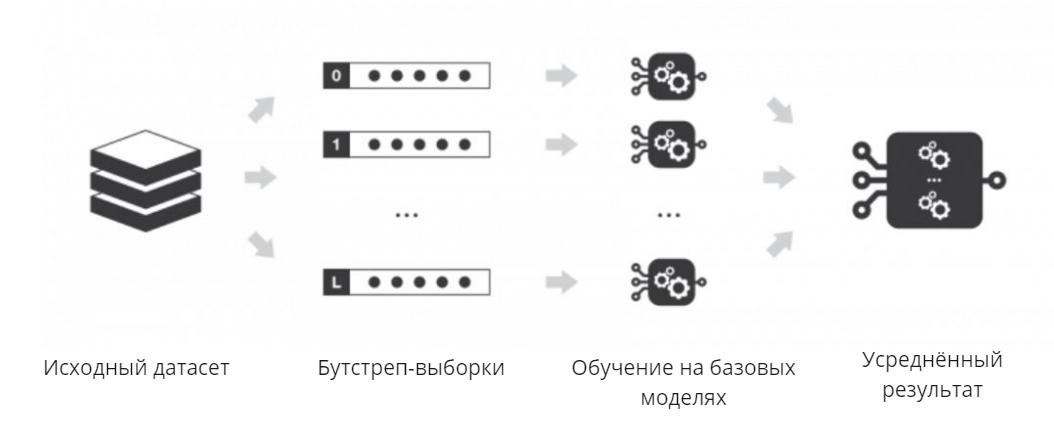

### Теперь давайте сформулируем и объясним эту идею математически.

Пусть у нас есть некоторая выборка, и мы с помощью бутстрепа генерируем из неё ещё $B$ выборок:

$$X_1,...,X_B$$

После этого мы определяем много базовых алгоритмов (всего $B$ моделей — по числу выборок) и обучаем каждый базовый алгоритм $a_i(x)$ на своей выборке. После этого получаем итоговый результат:

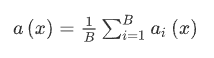

+ Если мы рассматриваем задачу **классификации**, то, по сути, модели «голосуют» за свой класс.
+ Если мы рассматриваем задачу **регрессии**, то результат — просто среднее арифметическое прогнозов по всем моделям.

Теперь посмотрим, **насколько применение бэггинга поможет нам улучшить качество модели**.

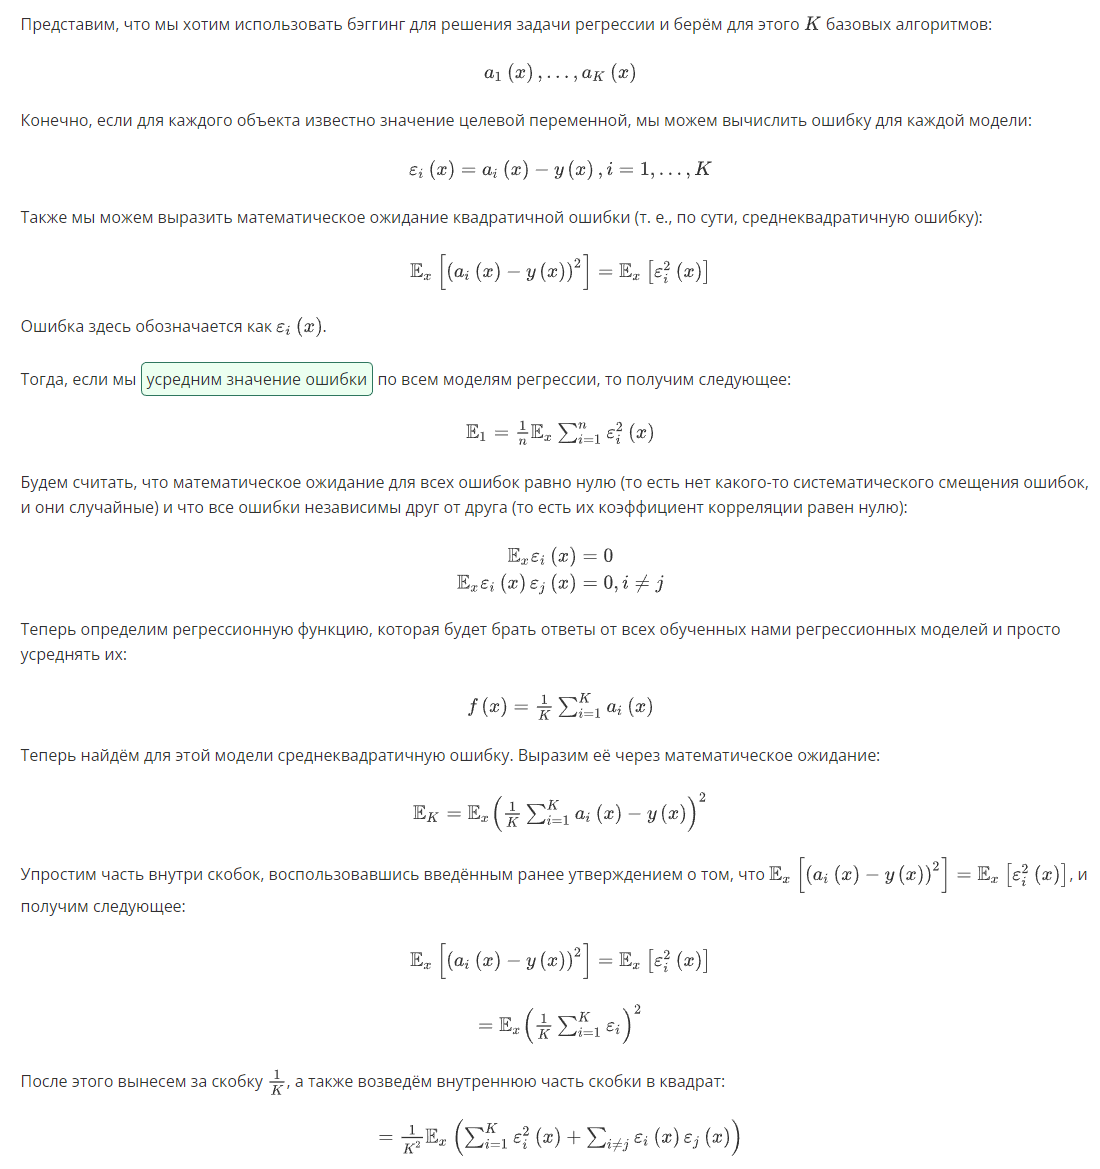
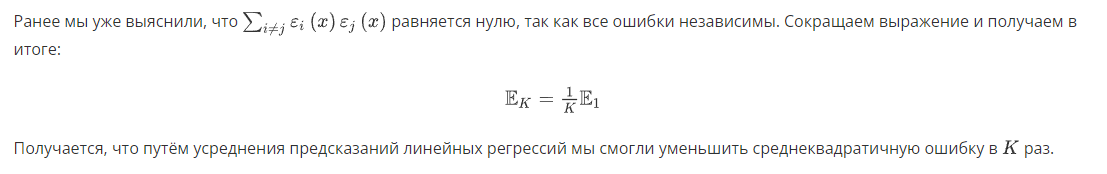

### Однако тут важно отметить, что при решении прикладных задач эффект будет не таким выраженным, так как здесь мы использовали предположение о полной независимости ошибок, а в реальной жизни такое случается редко.

Также, чтобы иметь полное представление о характеристиках рассматриваемого алгоритма, давайте вспомним про разложение ошибки на смещение и разброс.

Доказано, что бэггинг не ухудшает показатель смещения модели, то есть смещение у ансамбля ровно такое же, как и у одного базового алгоритма.

*Доказательство:*

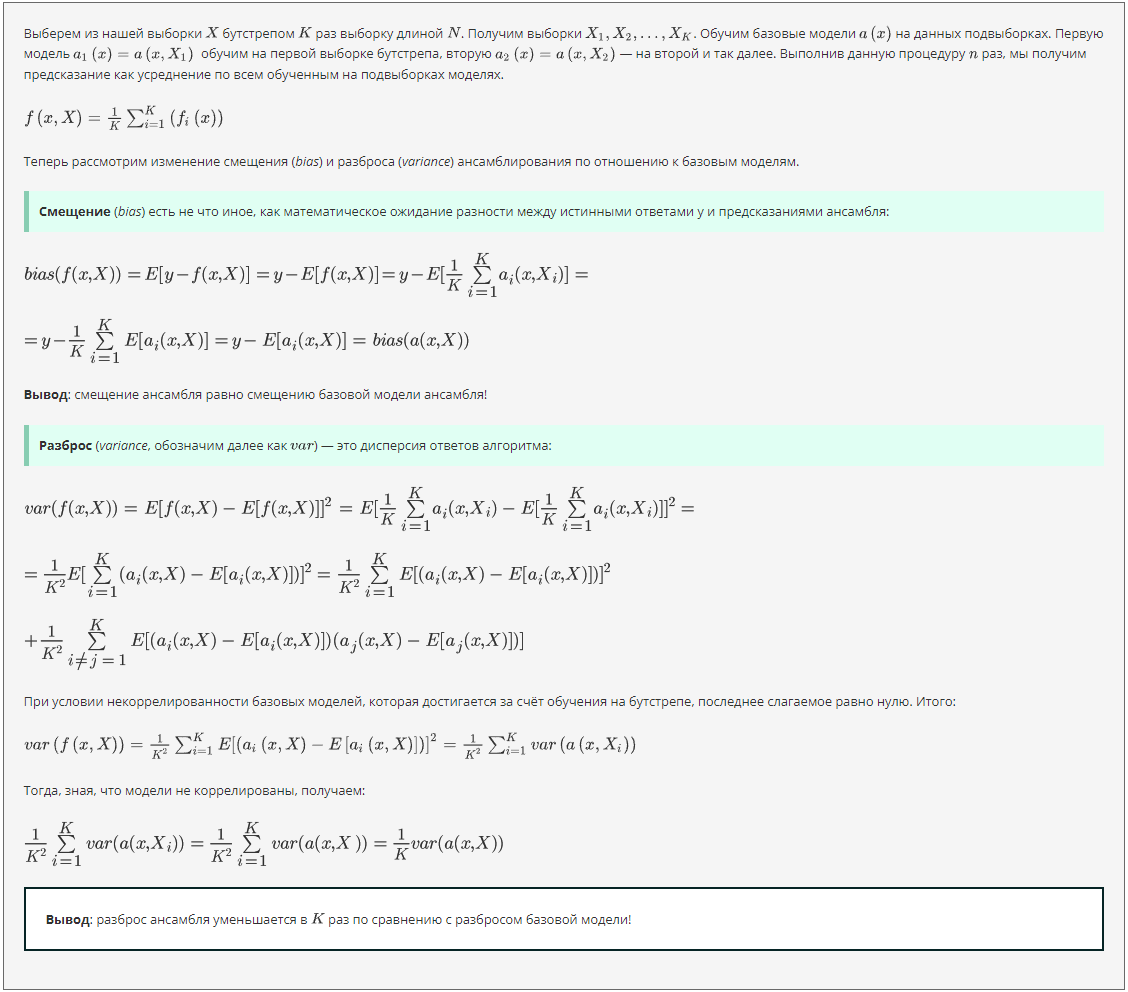

В общем случае разброс бэггинга будет выражаться следующим образом:

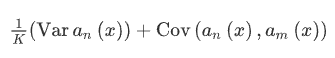

В данном выражении через $a_n(x)$ обозначен один из базовых алгоритмов, а за $a_m(x)$ — другой базовый алгоритм.

Из этого следует, что если модели (в данной формуле — базовые модели $a_n(x)$ и $a_m(x)$) независимы, то разброс для ансамбля типа бэггинг будет в $K$ раз меньше, чем разброс у отдельной модели.

## **Резюмируем:**

1. Бэггинг даёт уменьшение ошибки в $K$ раз по сравнению с одиночной моделью.
2. Бэггинг не уменьшает смещение по сравнению с одиночной моделью.
3. Бэггинг уменьшает разброс в $K$ раз по сравнению с одиночной моделью.

### Важно отметить, что эти утверждения выведены и доказаны теоретически и будут выполняться на практике только в том случае, если между ошибками нулевая корреляция.

Как видим, бэггинг — очень эффективный и полезный алгоритм, так что есть смысл попрактиковаться с ним.

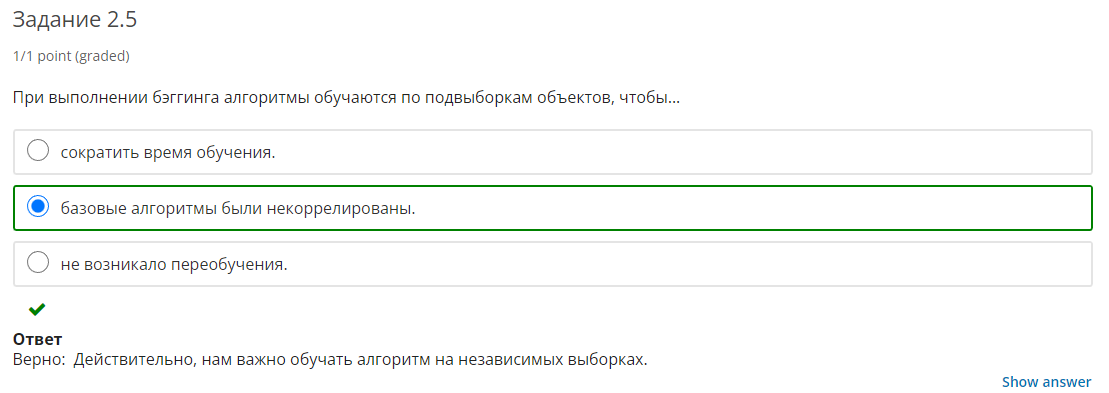

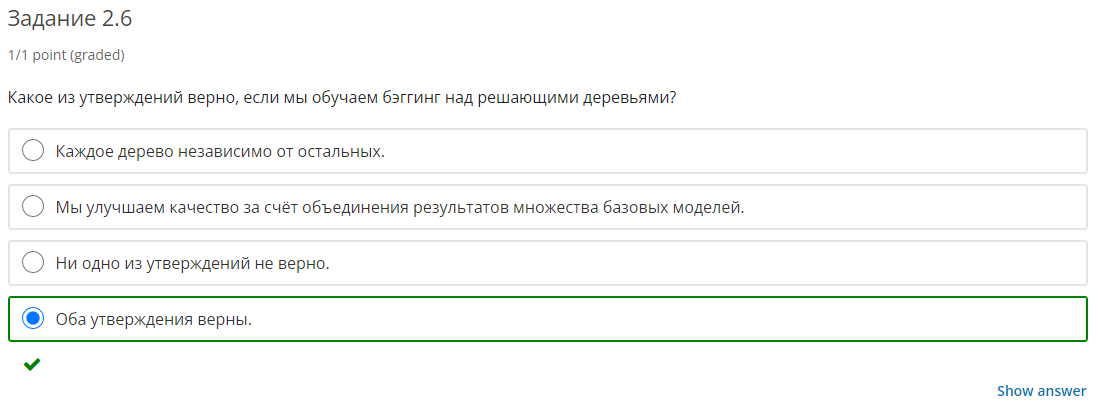

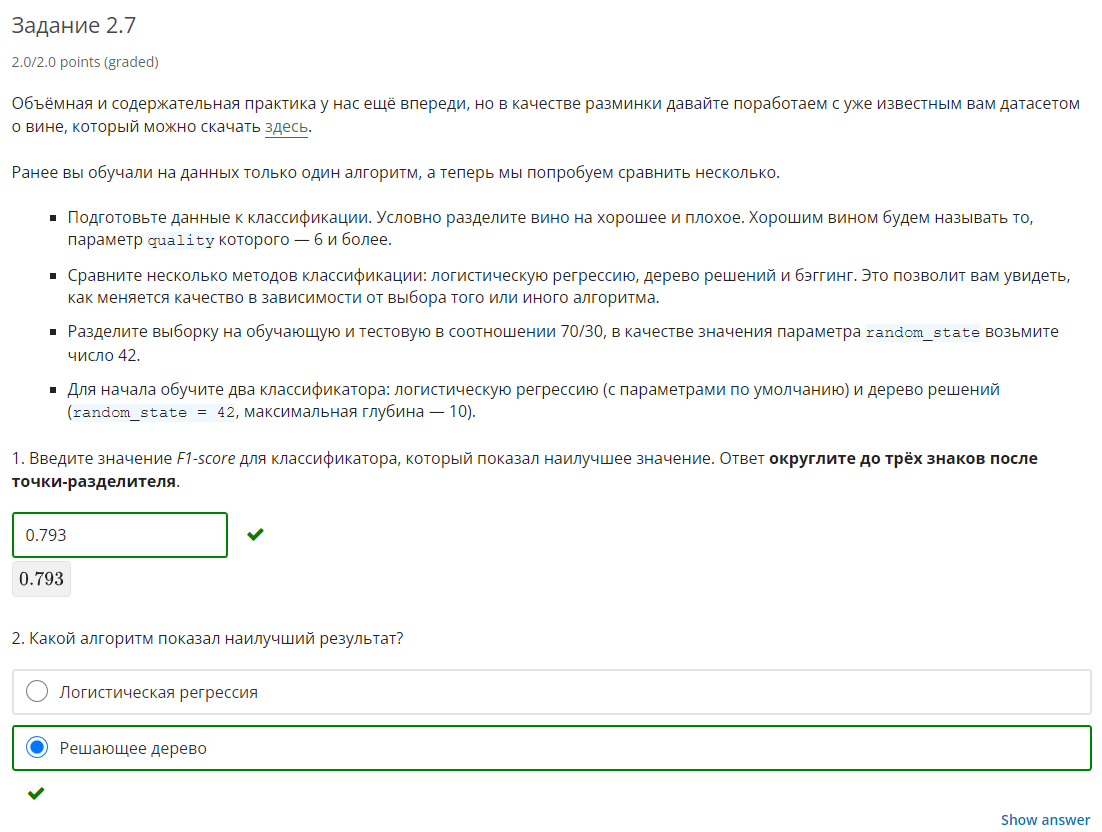

In [ ]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

In [ ]:
wine_data = pd.read_csv('wineQualityReds.csv', index_col=0)
wine_data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data['target']= np.where(wine_data.quality >=6,1,0)

Y = wine_data['target']
X = wine_data.drop(['target', 'quality'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
f1_score(preds_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7528517110266161

In [ ]:
model = DecisionTreeClassifier(max_depth = 10, random_state=42)
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
f1_score(preds_test, y_test)

0.7927927927927927

In [ ]:
df = pd.read_csv('wineQualityReds.csv', index_col=0)
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.loc[(df['quality'] < 6), 'target'] = 0
df.loc[(df['quality'] >= 6), 'target'] = 1
df = df.astype({'target': int})
y = df['target']
X = df.drop(['target', 'quality'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression()
#Обучаем модель
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
print('f1_score  для регрессии на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))
dt = DecisionTreeClassifier(
    max_depth = 10, # максимальная глубина
    random_state = 42
)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('f1_score для дерева решений на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score  для регрессии на тестовом наборе: 0.753
f1_score для дерева решений на тестовом наборе: 0.793


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


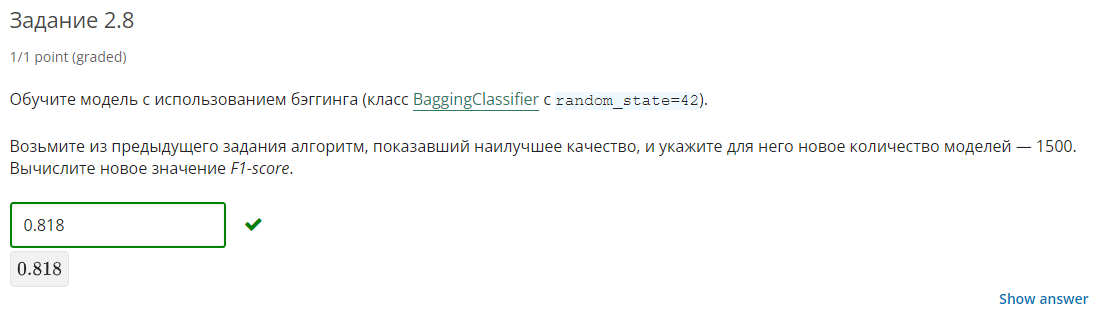

In [ ]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 10, random_state=42), n_estimators=1500, random_state=42).fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
f1_score(preds_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8181818181818181

⭐ Прекрасно! Теперь вы разбираетесь в алгоритме бэггинга и знаете, как формируются бутстреп-выборки, и готовы перейти к следующему юниту, где ваш ждёт один из видов бэггинга — **случайный лес →**